In [1]:
from config import geoapi_key
import pandas as pd
import requests
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
co_city_data = pd.read_csv(r"C:\Users\Brian Haynes\Desktop\Project_1\Resources\CO_SingFam_TopTier_BotTier_Combined.csv")

In [3]:
co_city_data

,Unnamed: 0,City,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157
1,1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995
2,2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080
5,5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683
6,6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348
7,7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862
8,8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964
9,9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808


In [4]:
#Get the cities lined up to be iterated through
for index, row in co_city_data.iterrows():
    print(index,row["City"])

0 Arvada
1 Aurora
2 Boulder
3 Breckenridge
4 Broomfield
5 Castle Rock
6 Colorado Springs
7 Denver
8 Englewood
9 Fort Collins
10 Frisco
11 Golden
12 Lakewood
13 Littleton
14 Longmont
15 Mesa
16 Parker
17 Pueblo
18 Thornton


In [5]:
base_url = "https://api.geoapify.com/v2/places?"
categories = "natural.mountain.peak"
radius = 10000
#Becuase it makes more sense for mountains within 10 km, can't live directly on a mountain 
params = {
    "categories" : categories,
    "apiKey" : geoapi_key,
    "limit" : 500
}

mountains = []

for index, row in co_city_data.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    
    params["bias"] = f'proximity:{lon},{lat}'
    params["filter"] = f'circle:{lon},{lat},{radius}'
    
    data = requests.get(base_url, params).json()
    
    mountains.append({"City":row["City"], "Number of Mountains": len(data["features"])})
    
    print(f"{row['City']}:{len(data['features'])}")

Arvada:1
Aurora:0
Boulder:28
Breckenridge:29
Broomfield:0
Castle Rock:0
Colorado Springs:12
Denver:2
Englewood:1
Fort Collins:1
Frisco:18
Golden:15
Lakewood:4
Littleton:1
Longmont:2
Mesa:9
Parker:0
Pueblo:1
Thornton:0


In [6]:
mountains_df = pd.DataFrame(mountains)
mountains_df

,City,Number of Mountains
0,Arvada,1
1,Aurora,0
2,Boulder,28
3,Breckenridge,29
4,Broomfield,0
5,Castle Rock,0
6,Colorado Springs,12
7,Denver,2
8,Englewood,1
9,Fort Collins,1


In [7]:
merged_df1 = pd.merge(mountains_df,co_city_data, on = "City", how = 'outer')

merged_df1

,City,Number of Mountains,Unnamed: 0,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,1,0,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,0,1,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,28,2,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,29,3,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,0,4,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,0,5,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,12,6,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,2,7,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,1,8,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,1,9,619802.66,737892.09,415641.79,40.550853,-105.066808


In [8]:
merged_df = merged_df1.drop(columns = 'Unnamed: 0')

In [9]:
merged_df

,City,Number of Mountains,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,1,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,0,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,28,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,29,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,0,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,0,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,12,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,2,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,1,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,1,619802.66,737892.09,415641.79,40.550853,-105.066808


In [10]:
merged_df[["City","Number of Mountains", "Typical Home Price (Single Family)"]]

,City,Number of Mountains,Typical Home Price (Single Family)
0,Arvada,1,663225.80
1,Aurora,0,530770.16
2,Boulder,28,1418469.92
3,Breckenridge,29,1397773.68
4,Broomfield,0,774477.19
5,Castle Rock,0,670136.92
6,Colorado Springs,12,506916.92
7,Denver,2,724441.68
8,Englewood,1,534049.28
9,Fort Collins,1,619802.66


In [11]:
x  = merged_df["City"]
y= merged_df["Number of Mountains"]


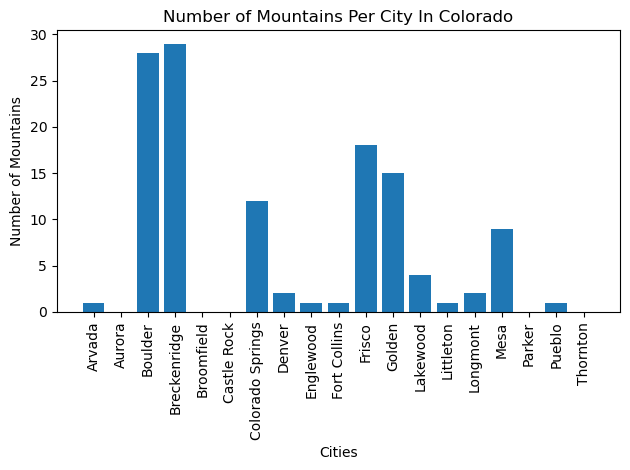

In [12]:
plt.bar(x,y)

plt.title("Number of Mountains Per City In Colorado")
plt.xlabel("Cities")
plt.ylabel("Number of Mountains")
plt.xticks(rotation="vertical")
plt.tight_layout()

In [14]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):

# Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Number of Mountains")
    plt.ylabel("Typical Home Price (Single Family)")
    print(f"The r-squared is: {rvalue}")
    plt.show()
 

The r-squared is: 0.7423850583619093


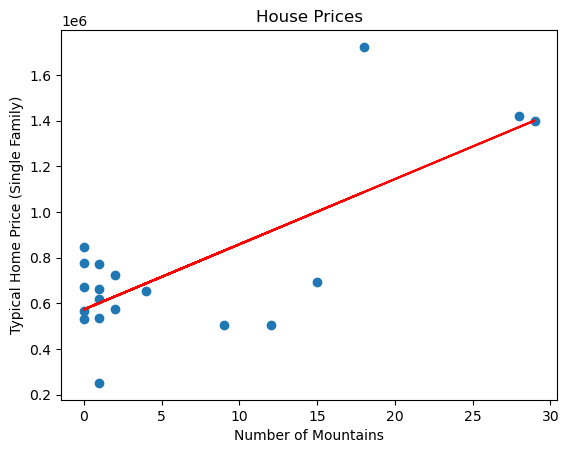

In [24]:
x_values = merged_df["Number of Mountains"]
y_values= merged_df["Typical Home Price (Single Family)"]
plot_linear_regression(x_values,
                       y_values,
                       "House Prices",
                       (0,0))  